In [2]:
import torch
import pandas as pd

In [3]:
cd ..

/home/yann/IVISpaces


In [4]:
from Data import get_setup

In [5]:
FBNN={'boston': {('FBNN', 'RMSE'): 2.378, ('FBNN', 'LPP'): -2.301},
      'concrete': {('FBNN', 'RMSE'): 4.935, ('FBNN', 'LPP'): -3.096},
      'energy': {('FBNN', 'RMSE'): 0.412, ('FBNN', 'LPP'): -0.684},
      'wine': {('FBNN', 'RMSE'): 0.673, ('FBNN', 'LPP'): -1.040},
      'yacht': {('FBNN', 'RMSE'): 0.607, ('FBNN', 'LPP'): -1.033},
     'navalC':{('FBNN', 'RMSE'): 0.00012, ('FBNN', 'LPP'): 7.130},
     'protein':{('FBNN', 'RMSE'): 4.326, ('FBNN', 'LPP'): -2.892},
       'kin8nm':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')},
       'powerplant':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')}

     }
sFBNN={'boston': {('FBNN', 'RMSE'): 0.104, ('FBNN', 'LPP'): 0.038},
      'concrete': {('FBNN', 'RMSE'): 0.180, ('FBNN', 'LPP'): 0.016},
      'energy': {('FBNN', 'RMSE'): 0.017, ('FBNN', 'LPP'): 0.020},
      'wine': {('FBNN', 'RMSE'): 0.014, ('FBNN', 'LPP'): 0.013},
      'yacht': {('FBNN', 'RMSE'): 0.068, ('FBNN', 'LPP'): 0.033},
      'navalC':{('FBNN', 'RMSE'): 0.0000, ('FBNN', 'LPP'): 0.024},
     'protein':{('FBNN', 'RMSE'): 0.019, ('FBNN', 'LPP'): 0.004},
       'kin8nm':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')},
       'powerplant':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')}

     }

# Experiment 1 #

## metrics on test #

In [18]:
RESULTS=torch.load('Results/NEW/UCI_Exp1_2020-10-21-17:06_metrics.pt')

In [19]:
methods=['HMC','NN-HyVI','FuNN-HyVI']#torch.distributions.kl.kl_divergence(middle,certain)#'EnsembleB',,'FuNNeVI-GP']#,'FBNN']#['FuNNeVI',]##
datasets=['boston', 'concrete', 'energy', 'wine', 'yacht']
metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,metrics])#, names=['method', 'metric']
index_rmse=pd.MultiIndex.from_product([methods,['RMSE']])
index_lpp=pd.MultiIndex.from_product([methods,['LPP']])


In [20]:
df_rmse=pd.DataFrame(RESULTS[0], index=index_rmse).transpose()
df_rmse_std=pd.DataFrame(RESULTS[1], index=index_rmse).transpose()
df_lpp=pd.DataFrame(RESULTS[0], index=index_lpp).transpose()
df_lpp_std=pd.DataFrame(RESULTS[1], index=index_lpp).transpose()

In [21]:
import numpy as np

for i in df_rmse.columns:
    df_rmse[i] = df_rmse[i].round(3).astype(str)+ "±" + ((df_rmse_std[i]/np.sqrt(3)).round(3)).astype(str)+""
for i in df_lpp.columns:
    df_lpp[i] = df_lpp[i].round(3).astype(str)+ "±" + ((df_lpp_std[i]/np.sqrt(3)).round(5)).astype(str)+""
    

In [23]:
print(df_rmse.to_latex())

\begin{tabular}{llll}
\toprule
{} &        HMC &      NN-HyVI &    FuNN-HyVI \\
{} &       RMSE &         RMSE &         RMSE \\
\midrule
boston   &  0.286±nan &  0.289±0.003 &  0.322±0.038 \\
concrete &  0.413±nan &  0.348±0.005 &  0.332±0.016 \\
energy   &  0.264±nan &  0.071±0.004 &    0.048±0.0 \\
wine     &  0.723±nan &  0.856±0.041 &  0.877±0.013 \\
yacht    &  0.251±nan &  0.083±0.001 &  0.066±0.005 \\
\bottomrule
\end{tabular}



In [24]:
print(df_lpp.to_latex())

\begin{tabular}{llll}
\toprule
{} &         HMC &         NN-HyVI &       FuNN-HyVI \\
{} &         LPP &             LPP &             LPP \\
\midrule
boston   &  -1.882±nan &  -1.844±0.00013 &  -1.849±0.00301 \\
concrete &  -2.443±nan &  -2.427±0.00019 &  -2.426±0.00031 \\
energy   &  -1.301±nan &  -1.258±0.00037 &    -1.256±1e-05 \\
wine     &  -1.117±nan &  -1.629±0.12349 &  -1.756±0.04499 \\
yacht    &  -1.326±nan &  -1.259±0.00023 &   -1.257±0.0003 \\
\bottomrule
\end{tabular}



## Predictive epistemic entropy

In [27]:
Entropy_=torch.load('Results/NEW/UCI_Exp1_2020-10-21-17:06_pred_entropy.pt')


In [34]:
methods=['HMC','NN-HyVI','FuNN-HyVI']
datasets=['boston', 'concrete', 'energy', 'wine', 'yacht']
index=pd.MultiIndex.from_product([methods,datasets])


df=pd.DataFrame(data=Entropy_, index=methods)
Entropy=df.to_dict()


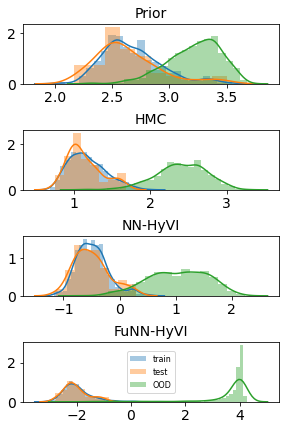

In [42]:
from Metrics import batch_entropy_nne


import seaborn as sns
from pylab import *

#predictive model
layerwidth=50
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 14,
              'xtick.labelsize' : 14,
              'ytick.labelsize' : 14,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_methods=len(methods)+1
fig,ax=plt.subplots(n_methods,1,figsize=(4,6),squeeze=False)


def OOD_sampler(x_train,n_ood):
    M = x_train.max(0, keepdim=True)[0]
    m = x_train.min(0, keepdim=True)[0]
    X = torch.rand(n_ood,x_train.shape[1]).to(device) * (M-m) + m                           
    return X

def EntropyKDE(ax, theta, X,  model, label):
    Y=[model(X[i],theta) for i in range(len(X))]
    H=[BatchEntropy(y.transpose(0,1),k=30) for y in Y]
    for i in range(len(H)):
        ax=sns.distplot(H[i].cpu(), label=label[i], ax=ax)

split_nb=0
label=['train', 'test', 'OOD']
dataset, dic ='concrete', Entropy['concrete']
m=0
setup_ = get_setup(dataset)
setup=setup_.Setup(device)
x_train, y_train=setup.train_data()
x_test, y_test=setup.test_data()


input_dim=x_train.shape[1]
param_count, model = get_mlp(input_dim, layerwidth, nblayers, activation) 
prior_theta=0.5*torch.randn(1000,param_count).to(device)

X=[x_train,x_test,OOD_sampler(x_train,1000)]
Y=[model(x,prior_theta) for x in X]

H=[batch_entropy_nne(y.transpose(0,1),k=30) for y in Y]

ax_=ax.flat
for i in range(len(H)):
    sns.distplot(H[i].cpu(), label=label[i], ax=ax_[m])
#ax_[0].set_ylabel('Prior',{'fontstyle':'italic'})
ax_[0].set_title('Prior')

#ax_[m].set_title(dataset)

m+=1
for method, Hs in dic.items():
    
    H=Hs[split_nb]
    for i in range(len(H)):
        sns.distplot(H[i].cpu(), label=label[i], ax=ax_[m])
    if method=='FuNNeVI' or method== 'GeNNeVI':
        #ax_[m].set_ylabel(method, {'fontweight':'bold'})
        ax_[m].set_title(method)
    else:
        #ax_[m].set_ylabel(method)
        ax_[m].set_title(method)

    m+=1

#handles, labels = ax_[0].get_legend_handles_labels()

#fig.legend(handles, labels, title='input distribution',title_fontsize=10,  loc=(.75,0.1),prop={'size': 10})
ax_[m-1].legend(loc='center', prop={'size': 8})
fig.tight_layout(pad=0.8)
fig.align_ylabels(ax[:, 0])
plt.savefig("Results/NEW/UCI_PredictiveEntropy_Exp1_{}.pdf".format(dataset), dpi=600)

plt.show()

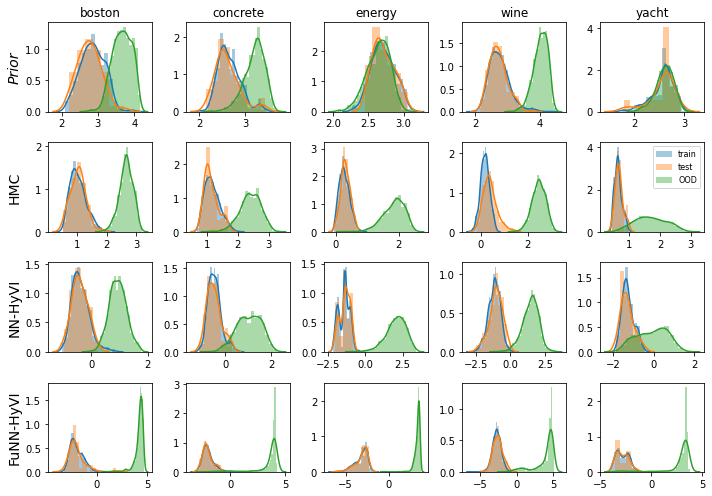

In [40]:
import seaborn as sns
from pylab import *

#predictive model
layerwidth=50
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)
method_names=['HMC','NN-HyVI','FuNN-HyVI']

n_datasets=5
n_methods=len(method_names)+1
fig,ax=plt.subplots(n_methods,n_datasets,figsize=(10,7),squeeze=False)


def OOD_sampler(x_train,n_ood):
    M = x_train.max(0, keepdim=True)[0]
    m = x_train.min(0, keepdim=True)[0]
    X = torch.rand(n_ood,x_train.shape[1]).to(device) * (M-m) + m                           
    return X

def EntropyKDE(ax, theta, X,  model, label):
    Y=[model(X[i],theta) for i in range(len(X))]
    H=[BatchEntropy(y.transpose(0,1),k=30) for y in Y]
    for i in range(len(H)):
        ax=sns.distplot(H[i].cpu(), label=label[i], ax=ax)

label=['train', 'test', 'OOD']

d=0
for dataset, dic in Entropy.items():# ='boston', Entropy['boston']
    m=0

    setup_ = get_setup(dataset)
    setup=setup_.Setup(device)
    x_train, y_train=setup.train_data()
    x_test, y_test=setup.test_data()


    input_dim=x_train.shape[1]
    param_count, model = get_mlp(input_dim, layerwidth, nblayers, activation) 
    prior_theta=0.5*torch.randn(1000,param_count).to(device)

    X=[x_train,x_test,OOD_sampler(x_train,1000)]
    Y=[model(x,prior_theta) for x in X]

    H=[batch_entropy_nne(y.transpose(0,1),k=30) for y in Y]

    for i in range(len(H)):
        sns.distplot(H[i].cpu(), label=label[i], ax=ax[0,d])
    ax[0,0].set_ylabel('Prior',{'fontstyle':'italic'})
    #ax_[0].set_title('Prior')

    ax[0,d].set_title(dataset)

    m+=1
    for method, Hs in dic.items():
        H=Hs[0]
        for i in range(len(H)):
            sns.distplot(H[i].cpu(), label=label[i], ax=ax[m,d])        
        if d==0:
            if method=='FuNNeVI' or method== 'GeNNeVI':
                ax[m,d].set_ylabel(method_names[m-1], {'fontweight':'bold'})
            else:
                ax[m,d].set_ylabel(method_names[m-1])

        m+=1
    d+=1
ax[1,d-1].legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
fig.align_ylabels(ax[:, 0])
plt.savefig("Results/NEW/UCI_PredictiveEntropy_Exp1.pdf", dpi=600)

plt.show()

## Entropy of posterior distribution ## 

In [59]:
H=torch.load('Results/NEW/UCI_Exp1_2020-10-21-17:06_post_entropy.pt')


In [60]:
methods=['HMC','NN-HyVI','FuNN-HyVI']
metrics=['paramH','funH']#
index_p=pd.MultiIndex.from_product([methods,['paramH']])
index_f=pd.MultiIndex.from_product([methods,['funH']])
df_p=pd.DataFrame(H[0], index=index_p).transpose()
df_f=pd.DataFrame(H[0], index=index_f).transpose()

df_p_std=pd.DataFrame(H[1], index=index_p).transpose()
df_f_std=pd.DataFrame(H[1], index=index_f).transpose()


In [62]:
df=df_p
df_std=df_p_std
index=index_p
for i in df[index].columns:
    df[i] = df[i].round(0).astype(str)+ "±" + ((df_std[i]/np.sqrt(3)).round(0)).astype(str)+""

In [63]:
print(df.to_latex())

\begin{tabular}{llll}
\toprule
{} &        HMC &     NN-HyVI &     FuNN-HyVI \\
{} &     paramH &      paramH &        paramH \\
\midrule
boston   &  971.0±0.0 &  1538.0±5.0 &    393.0±24.0 \\
concrete &  635.0±0.0 &  1090.0±7.0 &    433.0±15.0 \\
energy   &  628.0±0.0 &  1086.0±7.0 &    199.0±23.0 \\
wine     &  611.0±1.0 &  1431.0±4.0 &  -1536.0±49.0 \\
yacht    &  502.0±0.0 &   767.0±6.0 &     86.0±72.0 \\
\bottomrule
\end{tabular}



In [64]:
df=df_f
df_std=df_f_std
index=index_f
for i in df[index].columns:
    df[i] = df[i].round(0).astype(str)+ "±" + ((df_std[i]/np.sqrt(3)).round(0)).astype(str)+""

In [65]:
print(df.to_latex())

\begin{tabular}{llll}
\toprule
{} &         HMC &      NN-HyVI &  FuNN-HyVI \\
{} &        funH &         funH &       funH \\
\midrule
boston   &   -52.0±0.0 &   -393.0±2.0 &  316.0±7.0 \\
concrete &  -107.0±1.0 &   -433.0±5.0 &  270.0±3.0 \\
energy   &  -225.0±0.0 &  -265.0±11.0 &  144.0±6.0 \\
wine     &   -25.0±0.0 &   -278.0±8.0 &  272.0±5.0 \\
yacht    &  -244.0±0.0 &   -653.0±6.0 &  99.0±18.0 \\
\bottomrule
\end{tabular}



## kl divergence results ##

In [67]:
DIV, PDIV=torch.load('Results/NEW/UCI_Exp1_2020-10-21-17:06_kldiv.pt')


In [68]:
methods=['NN-HyVI','FuNN-HyVI']
datasets=['boston', 'concrete', 'energy', 'wine', 'yacht']
metrics=['KL(-,HMC)','KL(HMC,-)','KL(-,-)']
index=pd.MultiIndex.from_product([methods,metrics])

div=pd.DataFrame(DIV[0], index=index).transpose()
pdiv=pd.DataFrame(PDIV[0],index=index).transpose()
div_=pd.DataFrame(DIV[1], index=index).transpose()
pdiv_=pd.DataFrame(PDIV[1],index=index).transpose()
Div=div
Div_=div_

In [69]:
lat=Div.copy()

In [70]:
for i in Div.columns:
    lat[i] = Div[i].round(1).astype(str)+ "±" + ((Div_[i]/np.sqrt(3)).round(1)).astype(str)+""

In [71]:
print(lat.to_latex())

\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{l}{NN-HyVI} & \multicolumn{3}{l}{FuNN-HyVI} \\
{} &   KL(-,HMC) &   KL(HMC,-) &    KL(-,-) &   KL(-,HMC) &  KL(HMC,-) &   KL(-,-) \\
\midrule
boston   &    25.8±0.5 &   242.7±1.6 &   20.2±0.8 &   301.4±6.7 &  -20.3±2.2 &  17.3±4.1 \\
concrete &     6.4±1.6 &   248.4±6.3 &   16.3±5.2 &   309.2±2.8 &  -32.9±0.9 &   6.8±2.3 \\
energy   &    90.9±7.8 &   142.1±2.0 &   28.0±1.9 &   300.0±5.7 &  -22.0±1.0 &  14.9±2.3 \\
wine     &  142.6±11.5 &  396.8±21.6 &  382.2±9.1 &  241.9±12.5 &   82.3±2.9 &  40.4±3.4 \\
yacht    &    25.2±1.0 &   323.7±5.8 &   35.6±6.8 &  277.6±17.1 &   -4.0±6.8 &  39.9±6.4 \\
\bottomrule
\end{tabular}



# Experiment 2 #

In [72]:
RESULTS, STDS=torch.load('Results/NEW/UCI_small_Exp22020-10-21-00:34_metrics.pt')

for key in RESULTS.keys():
    print(key)

boston
concrete
energy
wine
yacht


In [73]:
for dataset in RESULTS.keys():
    RESULTS[dataset].update(FBNN[dataset])
    #RESULTS[dataset].update(RESULTS_[dataset])

for dataset in STDS.keys():
    STDS[dataset].update(sFBNN[dataset])

In [74]:
res=pd.DataFrame(RESULTS).transpose()

In [75]:
stds=pd.DataFrame(STDS).transpose()

In [77]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI', 'FBNN']


In [90]:
metrics=['RMSE']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round(2).astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round(2)).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
    
print(res_[index].to_latex())

\begin{tabular}{lllllll}
\toprule
{} &  McDropOut &   Ensemble &       MFVI &  FuNN-MFVI &    NN-HyVI &  FuNN-HyVI \\
{} &       RMSE &       RMSE &       RMSE &       RMSE &       RMSE &       RMSE \\
\midrule
boston   &   3.4±0.34 &  3.47±0.31 &  3.71±0.34 &   3.76±0.2 &  3.83±0.49 &  5.27±0.42 \\
concrete &   5.07±0.1 &  4.08±0.19 &   5.4±0.16 &  4.45±0.21 &  4.57±0.21 &   4.8±0.17 \\
energy   &  1.48±0.08 &  0.42±0.02 &  0.47±0.02 &  0.41±0.02 &  0.43±0.04 &  0.44±0.01 \\
wine     &  0.63±0.01 &  0.65±0.02 &  0.64±0.01 &  0.74±0.02 &  0.76±0.02 &  0.78±0.02 \\
yacht    &  0.88±0.08 &  0.69±0.06 &  0.85±0.11 &  0.68±0.07 &  0.63±0.08 &  0.88±0.09 \\
\bottomrule
\end{tabular}



In [91]:
metrics=['LPP']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round(2).astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round(2)).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
    
print(res_[index].to_latex())

\begin{tabular}{lllllll}
\toprule
{} &   McDropOut &    Ensemble &        MFVI &    FuNN-MFVI &     NN-HyVI &    FuNN-HyVI \\
{} &         LPP &         LPP &         LPP &          LPP &         LPP &          LPP \\
\midrule
boston   &  -2.64±0.14 &  -4.18±0.34 &  -2.87±0.16 &  -11.27±2.08 &  -5.55±1.86 &  -15.08±2.06 \\
concrete &  -3.03±0.02 &    -5.3±0.7 &  -3.11±0.03 &   -3.48±0.18 &  -3.15±0.13 &   -3.47±0.14 \\
energy   &  -2.12±0.01 &  -2.53±0.66 &  -0.68±0.05 &   -0.85±0.12 &  -0.53±0.08 &   -0.77±0.08 \\
wine     &   -2.02±0.1 &   -2.58±0.3 &  -0.98±0.02 &    -1.81±0.1 &  -1.46±0.08 &   -1.96±0.13 \\
yacht    &   -2.29±0.0 &   -0.6±0.15 &  -1.97±0.54 &   -9.78±2.87 &  -1.05±0.31 &   -3.27±1.45 \\
\bottomrule
\end{tabular}



In [94]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
metrics=['time [s]']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round().astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round()).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
    
print(res_[index].to_latex())

\begin{tabular}{lllllll}
\toprule
{} & McDropOut &   Ensemble &       MFVI &   FuNN-MFVI &    NN-HyVI &   FuNN-HyVI \\
{} &  time [s] &   time [s] &   time [s] &    time [s] &   time [s] &    time [s] \\
\midrule
boston   &  11.0±0.0 &  189.0±1.0 &   73.0±2.0 &   197.0±7.0 &   88.0±3.0 &   142.0±7.0 \\
concrete &  17.0±0.0 &  366.0±1.0 &  127.0±4.0 &   298.0±8.0 &  159.0±4.0 &  250.0±10.0 \\
energy   &  14.0±0.0 &  273.0±1.0 &  116.0±4.0 &   195.0±8.0 &  107.0±3.0 &   230.0±8.0 \\
wine     &  25.0±0.0 &  560.0±2.0 &  168.0±4.0 &  543.0±23.0 &  310.0±8.0 &  451.0±16.0 \\
yacht    &   9.0±0.0 &  115.0±0.0 &   47.0±3.0 &    96.0±6.0 &   52.0±3.0 &    78.0±2.0 \\
\bottomrule
\end{tabular}



## Predictive Epistemic Entropy #

In [100]:
Entropy=torch.load('Results/NEW/UCI_small_Exp22020-10-21-00:34_entropy.pt')


In [102]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
datasets=['boston', 'concrete', 'energy','wine', 'yacht']
#metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,datasets])

df=pd.DataFrame(data=Entropy, index=methods, columns=datasets)
Entropy=df.to_dict()
df

,boston,concrete,energy,wine,yacht
McDropOut,"[[[tensor(-0.7758, device='cuda:0'), tensor(-0...","[[[tensor(-1.1056, device='cuda:0'), tensor(-1...","[[[tensor(-1.4335, device='cuda:0'), tensor(-0...","[[[tensor(-0.7640, device='cuda:0'), tensor(-0...","[[[tensor(-0.1729, device='cuda:0'), tensor(-1..."
Ensemble,"[[[tensor(-2.1813, device='cuda:0'), tensor(-1...","[[[tensor(-1.3108, device='cuda:0'), tensor(-1...","[[[tensor(-3.0248, device='cuda:0'), tensor(-3...","[[[tensor(0.5049, device='cuda:0'), tensor(-0....","[[[tensor(-2.1821, device='cuda:0'), tensor(-3..."
MFVI,"[[[tensor(-0.8427, device='cuda:0'), tensor(-1...","[[[tensor(-1.4765, device='cuda:0'), tensor(-1...","[[[tensor(-3.2559, device='cuda:0'), tensor(-2...","[[[tensor(-1.1410, device='cuda:0'), tensor(-1...","[[[tensor(-2.1049, device='cuda:0'), tensor(-3..."
FuNN-MFVI,"[[[tensor(-5.5750, device='cuda:0'), tensor(-4...","[[[tensor(-6.7498, device='cuda:0'), tensor(-7...","[[[tensor(-9.5100, device='cuda:0'), tensor(-5...","[[[tensor(-4.7153, device='cuda:0'), tensor(-8...","[[[tensor(-2.5051, device='cuda:0'), tensor(-1..."
NN-HyVI,"[[[tensor(-1.5019, device='cuda:0'), tensor(-1...","[[[tensor(-2.3638, device='cuda:0'), tensor(-2...","[[[tensor(-3.0188, device='cuda:0'), tensor(-2...","[[[tensor(-1.1015, device='cuda:0'), tensor(-1...","[[[tensor(-4.3315, device='cuda:0'), tensor(-3..."
FuNN-HyVI,"[[[tensor(-2.9516, device='cuda:0'), tensor(-3...","[[[tensor(-3.5850, device='cuda:0'), tensor(-4...","[[[tensor(-3.3519, device='cuda:0'), tensor(-4...","[[[tensor(-3.4157, device='cuda:0'), tensor(-3...","[[[tensor(-9.0478, device='cuda:0'), tensor(-5..."


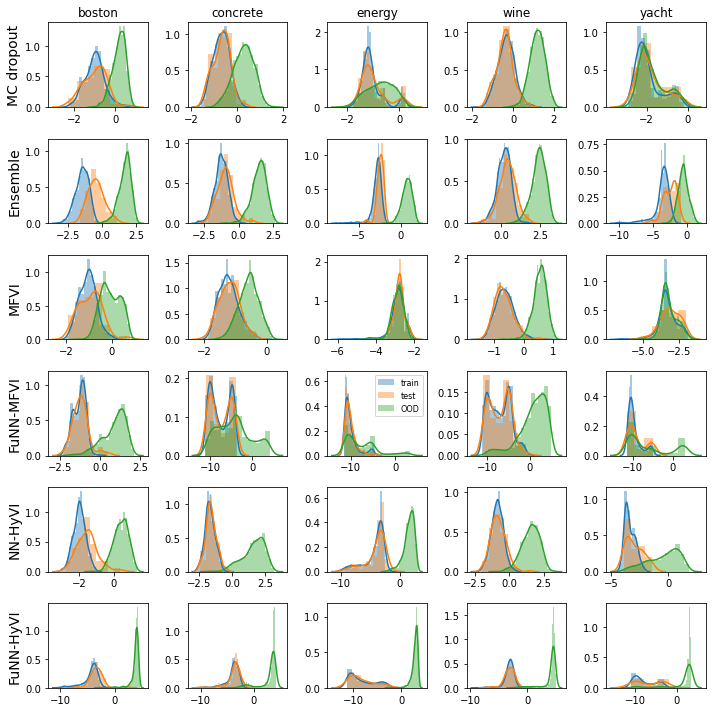

In [105]:
from Models import get_mlp
from torch import nn


import seaborn as sns
from pylab import *

#predictive model
layerwidth=50
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_datasets=len(datasets)
n_methods=len(methods)
fig,ax=plt.subplots(n_methods,n_datasets,figsize=(10,10),squeeze=False)


method_names=['MC dropout','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']

label=['train', 'test', 'OOD']
split=5

d=0
for dataset, dic in Entropy.items():
    m=0
    ax[m,d].set_title(dataset)
    for method, Hs in dic.items():
        H=Hs[split]
        for i in range(len(H)):
            sns.distplot(H[i].cpu(), label=label[i], ax=ax[m,d], kde=True)#, color=colors[i])#, hist=False, norm_hist=True)#color=colors[i],
            if d ==0:
                if method=='FuNNeVI' or method== 'GeNNeVI':
                    ax[m,d].set_ylabel(method_names[m], {'fontweight':'bold'})
                else:
                    ax[m,d].set_ylabel(method_names[m])
        m+=1
        
    d+=1
ax[3,2].legend(loc='upper right', prop={'size': 8})#bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()
fig.align_ylabels(ax[:, 0])
plt.savefig("Results/NEW/UCI_PredictiveEntropy_Exp2.pdf", dpi=600)
#plt.subplots_adjust(top=.9)
#plt.suptitle('Posterior Predictive Entropy Distributions')
plt.show()

# Synthetic Data Set: Wave OOS #

In [41]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

x_pred=torch.linspace(-4.,2.,500).unsqueeze(-1).to(device)

setup_ = get_setup('foong')
setup=setup_.Setup(device) 


x_train, y_train=setup.train_data()

def PlotFoong(ax, method, y_pred, x_pred=x_pred,  x=x_train, y=y_train, device=device):
 
    parameters = {'axes.labelsize':18,
                  'axes.titlesize': 18,
                  'xtick.labelsize' : 15,
                  'ytick.labelsize' : 15,
                  'figure.titlesize':14}


    plt.rcParams.update(parameters)
    
    N=y_pred.shape[0]
    m_3=int(0.001*N)
    M_3=N-m_3
    m_2=int(0.021*N)
    M_2=N-m_2
    m_1=int(0.136*N)
    M_1=N-m_1

    x_pred=x_pred.squeeze()

    pred,_=y_pred.sort(dim=0)
    y_mean=y_pred.mean(dim=0).squeeze().cpu()
    y_3=pred[m_3,:].squeeze().cpu()
    Y_3=pred[M_3,:].squeeze().cpu()
    y_2=pred[m_2,:].squeeze().cpu()
    Y_2=pred[M_2,:].squeeze().cpu()    
    y_1=pred[m_1,:].squeeze().cpu()
    Y_1=pred[M_1,:].squeeze().cpu()

    

    ax.plot(x_pred.cpu(), torch.cos(4.0*(x_pred+0.2)).cpu(),'--', linewidth=1., color='darkcyan')
    color='springgreen'#'darkgreen'#'dodgerblue'#
#    ax.fill_between(x_pred.cpu(), y_3, Y_3, facecolor=color, alpha=0.3)
#    ax.fill_between(x_pred.cpu(), y_2, Y_2, facecolor=color, alpha=0.2)
#    ax.fill_between(x_pred.cpu(), y_1, Y_1, facecolor=color, alpha=0.1)
    
    ax.fill_between(x_pred.cpu(), Y_2, Y_3, facecolor='springgreen', alpha=0.2)
    ax.fill_between(x_pred.cpu(), Y_1, Y_2, facecolor='springgreen', alpha=0.4)
    ax.fill_between(x_pred.cpu(), y_1, Y_1, facecolor='springgreen', alpha=0.7)
    ax.fill_between(x_pred.cpu(), y_2, y_1, facecolor='springgreen', alpha=0.4)
    ax.fill_between(x_pred.cpu(), y_3, y_2, facecolor='springgreen', alpha=0.2)

    ax.set_yticks([-3,0,3])
    ax.set_xticks([-3,-2,-1,0,1])
    ax.grid(True, which='major', linewidth=0.5)
    ax.set_ylim(-5, 5)
    ax.set_xlim(-4.,2.)
    if method == 'NN-HyVI' or method =='FuNN-HyVI':
        ax.set_title(method, {'fontweight':'bold'})
    else:
        ax.set_title(method)
    ax.scatter(x.cpu(), y.cpu() , marker='.',linewidth=.5, color='black',zorder=4)
    ax.plot(x_pred.cpu(), y_mean, color='darkgreen', linewidth=1.)

    return fig


In [62]:
x_pred,Wave=torch.load('Results/NEW/WaveOOD_2020-10-22-00:45.pt')
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI', 'HMC']
#df=pd.DataFrame(Wave,index=methods)

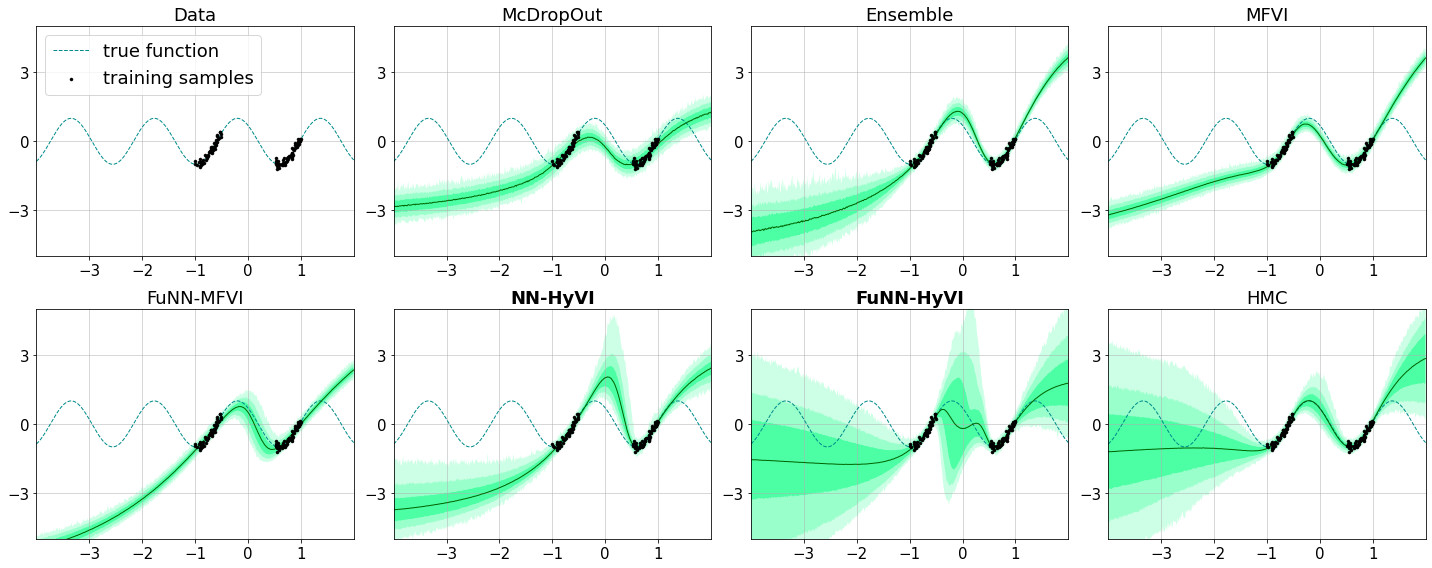

In [63]:
from pylab import *
fig, ax=plt.subplots(2,4, figsize=(20,8))


method_names=['MC dropout','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','HMC','FuNN-HyVI']


parameters = {'axes.labelsize':18,
              'axes.titlesize': 18,
              'xtick.labelsize' : 18,
              'ytick.labelsize' : 18,
              'figure.titlesize':14}

plt.rcParams.update(parameters)

ax.flat[0].plot(x_pred.cpu(), torch.cos(4.0*(x_pred+0.2)).cpu(),'--', linewidth=1., color='darkcyan', label='true function')

ax.flat[0].set_yticks([-3,0,3])
ax.flat[0].set_xticks([-3,-2,-1,0,1])
ax.flat[0].grid(True, which='major', linewidth=0.5)
ax.flat[0].set_ylim(-5, 5)
ax.flat[0].set_xlim(-4.,2.)
ax.flat[0].set_title('Data')
ax.flat[0].scatter(x_train.cpu(), y_train.cpu() , marker='.', linewidth=.5,  label='training samples',color='black',zorder=4)
ax.flat[0].legend(loc='upper left', prop={'size': 18})
i=1
for method in methods:
    y=Wave[method]
    PlotFoong(ax.flat[i],method,y, x_pred=x_pred)
    i+=1

fig.tight_layout()#h_pad=3., w_pad=3.)
plt.savefig('Results/NEW/WAVE.pdf', dpi=600)


# Isotropic Gaussian example #

In [29]:
from torch.distributions import MultivariateNormal as MV

N=200
#certain=MV(torch.zeros(N), covariance_matrix=0.1*torch.eye(N))
uncertain=MV(torch.zeros(N), covariance_matrix=.1*torch.eye(N))
sigmas=torch.linspace(0.03, .35, 20)
uTm=torch.Tensor(20)
cTm=torch.Tensor(20)
mTu=torch.Tensor(20)
mTc=torch.Tensor(20)
for i in range(20):
    middle=MV(torch.zeros(N), covariance_matrix=sigmas[i]*torch.eye(N))
    uTm[i]=torch.distributions.kl.kl_divergence(uncertain,middle)
#    cTm[i]=torch.distributions.kl.kl_divergence(certain,middle)
    mTu[i]=torch.distributions.kl.kl_divergence(middle,uncertain)
#    mTc[i]=torch.distributions.kl.kl_divergence(middle,certain)


/home/yann/anaconda3/envs/bnn/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
uTm, cTm

(tensor([1.1294e+02, 3.7644e+01, 1.1901e+01, 2.5244e+00, 3.5950e-02, 8.4497e-01,
         3.3481e+00, 6.7487e+00, 1.0621e+01, 1.4725e+01, 1.8920e+01, 2.3124e+01,
         2.7286e+01, 3.1376e+01, 3.5377e+01, 3.9279e+01, 4.3078e+01, 4.6771e+01,
         5.0360e+01, 5.3848e+01]),
 tensor([ 1.4612e+26,  4.5609e-41, -1.7634e+12,  3.0618e-41,  1.2644e+11,
          3.9201e+00, -9.2935e+10,  4.0633e+00,  0.0000e+00,  1.8750e+00,
          6.8664e-44,  0.0000e+00, -2.6340e+12,  3.0618e-41, -2.4461e+12,
          3.0618e-41,  1.2644e+11,  3.9201e+00, -9.2935e+10,  4.0633e+00]))

In [31]:
from pylab import *
import matplotlib.pyplot as plt

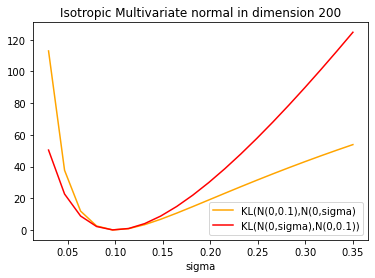

In [161]:
plt.plot(sigmas,uTm, label='KL(N(0,0.1),N(0,sigma)', color='orange')
plt.plot(sigmas,mTu, label='KL(N(0,sigma),N(0,0.1))',color='red')

#plt.plot(sigmas,cTm, label='KL(N(0,0.1),N(0,sigma))',color='blue')
#plt.plot(sigmas,mTc, label='KL(N(0,sigma),N(0,0.1))', color='green')

plt.xlabel('sigma')
plt.title('Isotropic Multivariate normal in dimension {}'.format(N))
plt.legend()

In [100]:
from torch.distributions import MultivariateNormal as MV

N=200
small=0.1
medium=0.5
large=2.
certain=MV(torch.zeros(N), covariance_matrix=small*torch.eye(N))
middle=MV(torch.zeros(N), covariance_matrix=medium*torch.eye(N))
uncertain=MV(torch.zeros(N), covariance_matrix=large*torch.eye(N))
print('KL(N(0,large*I),N(0,medium*I): {}'.format(torch.distributions.kl.kl_divergence(uncertain,middle)))
print('KL(N(0,sigma),N(0,1)): {}'.format(torch.distributions.kl.kl_divergence(middle,uncertain)))
print('mean: {}'.format(0.5*torch.distributions.kl.kl_divergence(uncertain,middle)+0.5*torch.distributions.kl.kl_divergence(middle,uncertain)))
print('KL(N(0,0.1),N(0,sigma)): {}'.format(torch.distributions.kl.kl_divergence(certain,middle)))
print('KL(N(0,sigma),N(0,0.1)): {}'.format(torch.distributions.kl.kl_divergence(middle,certain)))
print('mean: {}'.format(0.5*torch.distributions.kl.kl_divergence(certain,middle)+0.5*torch.distributions.kl.kl_divergence(middle,certain)))

KL(N(0,large*I),N(0,medium*I): 161.37054443359375
KL(N(0,sigma),N(0,1)): 63.629425048828125
mean: 112.49998474121094
KL(N(0,0.1),N(0,sigma)): 80.94381713867188
KL(N(0,sigma),N(0,0.1)): 239.05618286132812
mean: 160.0
